In [1]:
import os
BAR = 'Barcodes_1d'
ROOT = open('../root').read().strip()
print ROOT
img_path = os.path.join(ROOT, 'common')
print img_path
anno_path = os.path.join(ROOT, BAR, 'annotations.json')
print anno_path
empty_path = os.path.join(ROOT, 'Empty', 'annotations.json')
print empty_path

/home/nik-kochetov/work
/home/nik-kochetov/work/common
/home/nik-kochetov/work/Barcodes_1d/annotations.json
/home/nik-kochetov/work/Empty/annotations.json


In [2]:
import model
reload(model)

Using TensorFlow backend.


<module 'model' from 'model.pyc'>

In [3]:
import converter
from model import SSDModel, PixelsModel
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
%matplotlib inline

In [6]:
pixels_model = PixelsModel()
ssd_model = SSDModel()

In [7]:
pixels_path = os.path.join(ROOT, 'pixel_models', 'model.24-03-2018.gen3.11_pixels_patches_and_empty_data.ssd.02 (1).hdf5')
pixels_model.model.load_weights(pixels_path)

In [251]:
ssd_path = os.path.join(ROOT, 'edge_models', 'model.23-05-2018.gen3.13_ssd_only_edges.ssd.09.hdf5')
ssd_model.model.load_weights(ssd_path)

In [14]:
import json
with open(anno_path) as f:
    annos = json.loads(f.read())
print len(annos)
print annos[0]

with open(empty_path) as f:
    empty_annos = json.loads(f.read())
print len(empty_annos)
print empty_annos[0]

all_annos = annos + empty_annos

8111
{u'name': u'0001.jpg', u'shape': [3585, 2661, 3], u'Rects': [[594, 1081, 326, 575], [568, 1054, 1131, 1382], [593, 1074, 718, 968], [572, 1057, 1566, 1817], [564, 1050, 1964, 2217], [567, 1048, 2437, 2691]], u'path': u'Barcodes_1d/UPC-E', u'id': u'0001', u'Types': [u'UPCE', u'UPCE', u'UPCE', u'UPCE', u'UPCE', u'UPCE']}
10156
{u'Rects': [], u'path': u'Empty', u'shape': [4400, 3400, 3], u'name': u'9468_020.4B.tif.jpg', u'Types': []}


In [23]:
import generator
reload(generator)
from generator import Generator
ssd_generator = Generator(ROOT, ssd_model)

In [24]:
generator = ssd_generator.generate(all_annos, 512 * 512 * 1, True)

In [260]:
gen = next(generator)

next batch:
('img:', u'Barcodes_1d/Wide Barcodes 1D (5)/0145.jpg')
('window: ', Rect(2979, 1707, 3491, 2219))
('tensors:', [(2, 6, 0.75, 0.0, 1.0, 1.0, 0.25), (3, 6, 0.75, 0.0, 1.0, 1.0, 0.25), (4, 6, 0.75, 0.0, 1.0, 1.0, 0.25), (5, 6, 0.75, 0.0, 1.0, 1.0, 0.25), (2, 7, 0.0, 0.0, 0.96875, 1.0, 0.96875), (3, 7, 0.0, 0.0, 0.96875, 1.0, 0.96875), (4, 7, 0.0, 0.0, 0.96875, 1.0, 0.96875), (5, 7, 0.0, 0.0, 0.96875, 1.0, 0.96875)])


In [261]:
img = gen[0]['input']
print img.shape

(1, 512, 512, 3)


In [262]:
def unprocess(y):
        x = np.copy(y)
        # Zero-decenter by mean pixel
        x[:, :, :, 0] += 103.939
        x[:, :, :, 1] += 116.779
        x[:, :, :, 2] += 123.68

        # 'BGR'->'RGB'
        x = x[:, :, :, ::-1]
        print np.max(x), np.min(x)
        return x / 256.0

255.0 0.0


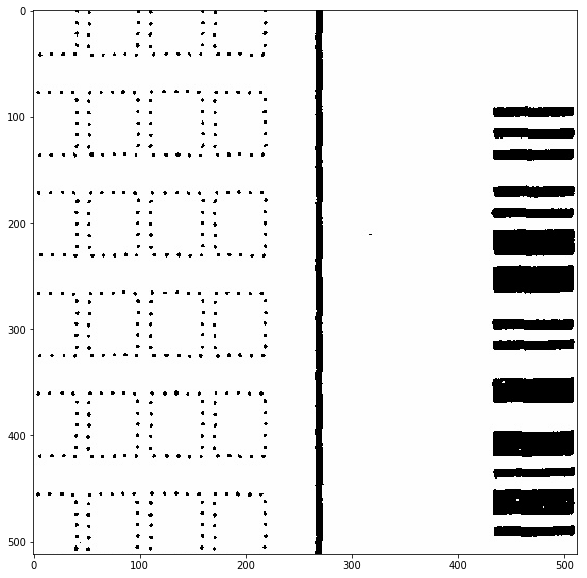

In [263]:
init_img = unprocess(img)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#show_img_from_gen(ax1, gen[0])
ax.imshow(init_img[0,:,:,:], cmap='gray')

0.0 0.99609375
0.0 0.99609375


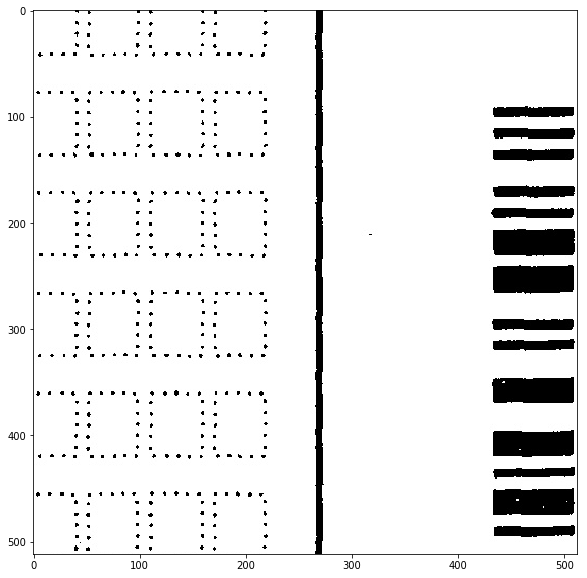

In [264]:
from skimage import color 
print np.min(init_img), np.max(init_img)
g_img = color.rgb2gray(init_img[0,:,:,:])
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#show_img_from_gen(ax1, gen[0])
print np.min(g_img), np.max(g_img)
ax.imshow(g_img, cmap='gray')

In [265]:
import predictor
reload(predictor)
from predictor import Predictor

In [266]:
print np.min(init_img), np.max(init_img)

0.0 0.99609375


In [267]:
pred = Predictor(ssd_model, pixels_model)

In [268]:
%%time
rects = pred.predict(init_img)
print rects

(1, 16, 16)
(1, 8, 8, 2) (1, 8, 8, 2)
[[[[ 0.22744247  0.18446204]
   [ 0.16177389  0.0747624 ]
   [ 0.19010484  0.00804925]
   [ 0.14289717  0.0280408 ]
   [ 0.15095316  0.01435994]
   [ 0.15047035  0.00569361]
   [ 0.11105229 -0.08436389]
   [ 0.16452982  0.09206067]]

  [[ 0.20737484  0.17948431]
   [ 0.15258399  0.01944246]
   [ 0.15913707 -0.08642134]
   [ 0.11086849 -0.05881211]
   [ 0.10350577 -0.05700514]
   [ 0.11932023 -0.057043  ]
   [ 0.05000957 -0.11020218]
   [ 0.2568149   0.00749754]]

  [[ 0.24474648  0.17010862]
   [ 0.15972283 -0.0079044 ]
   [ 0.17364681 -0.12432346]
   [ 0.12491933 -0.08768037]
   [ 0.11794721 -0.08352704]
   [ 0.13640739 -0.07862177]
   [ 0.06490907 -0.12018219]
   [ 0.28553981 -0.04197706]]

  [[ 0.2443568   0.14084096]
   [ 0.1435449  -0.0391918 ]
   [ 0.15824708 -0.13376372]
   [ 0.11934119 -0.09290694]
   [ 0.1101241  -0.08339112]
   [ 0.12991923 -0.06879131]
   [ 0.07058604 -0.11919129]
   [ 0.27939826 -0.04076255]]

  [[ 0.24375167  0.1297473

l=467.378469195,t=67.0629377365,r=508.985434187,b=491.800704956
None


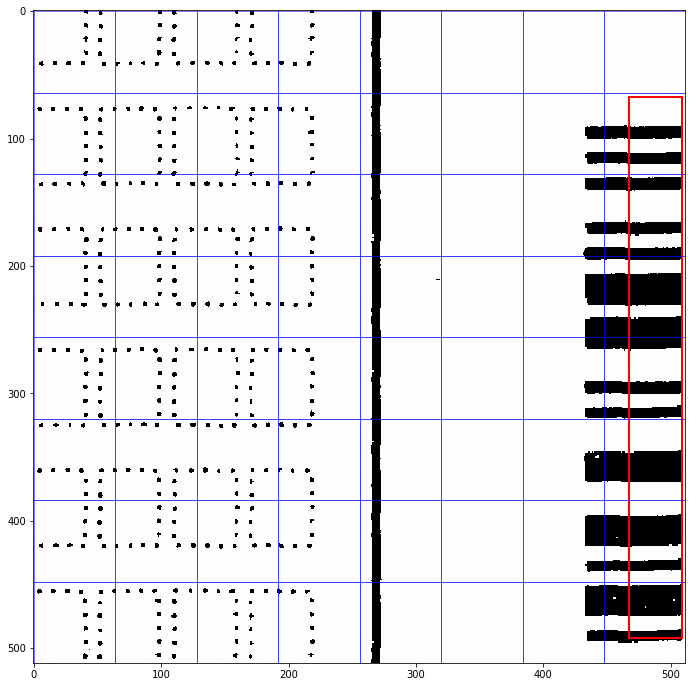

In [269]:
from rect import Rect

# Create figure and axes
fig,ax = plt.subplots(1, figsize=(12, 12))

# Display the image
ax.imshow(init_img[0])

#r = patches.Rectangle((50,50),100,100,linewidth=2,edgecolor='r',facecolor='none')
#ax.add_patch(r)


for rect in rects:
    # Create a Rectangle patch
    rr = rect.copy()
    #rr.stretch(300, 300)
    print rr.dump()
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=2,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)

cnt = 8
edge = 64
for i in range(cnt):
    for j in range(cnt):
    # Create a Rectangle patch
        rr = Rect(edge * i, edge * j, edge * (i + 1), edge * (j + 1))
        r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=0.5,edgecolor='b',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(r)

plt.show()